In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/desafio_indicium_imdb.csv")
df.head()


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [2]:
# Convertendo colunas numéricas
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors="coerce")
df["No_of_Votes"] = pd.to_numeric(df["No_of_Votes"], errors="coerce")

# Transformando Runtime e Gross
df["Runtime_min"] = df["Runtime"].str.extract("(\d+)").astype(float)
df["Gross_num"] = df["Gross"].str.replace("[\$,]", "", regex=True).astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
 16  Runtime_min    999 non-null    float64
 17  Gross_num      830 non-null    float64
dtypes: float64

In [3]:
# Estatísticas descritivas das variáveis numéricas principais
df[["IMDB_Rating", "Meta_score", "No_of_Votes", "Runtime_min", "Gross_num"]].describe()

,IMDB_Rating,Meta_score,No_of_Votes,Runtime_min,Gross_num
count,999.000000,842.000000,9.990000e+02,999.000000,8.300000e+02
mean,7.947948,77.969121,2.716214e+05,122.871872,6.808257e+07
std,0.272290,12.383257,3.209126e+05,28.101227,1.098076e+08
min,7.600000,28.000000,2.508800e+04,45.000000,1.305000e+03
25%,7.700000,70.000000,5.547150e+04,103.000000,3.245338e+06
50%,7.900000,79.000000,1.383560e+05,119.000000,2.345744e+07
75%,8.100000,87.000000,3.731675e+05,137.000000,8.087634e+07
max,9.200000,100.000000,2.303232e+06,321.000000,9.366622e+08


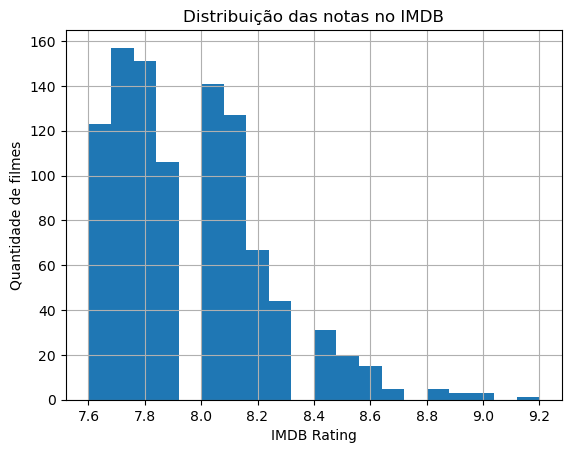

In [4]:
df["IMDB_Rating"].hist(bins=20)
plt.xlabel("IMDB Rating")
plt.ylabel("Quantidade de filmes")
plt.title("Distribuição das notas no IMDB")
plt.show()

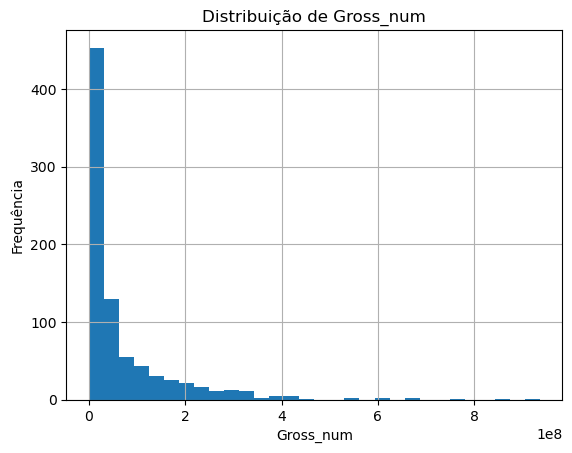

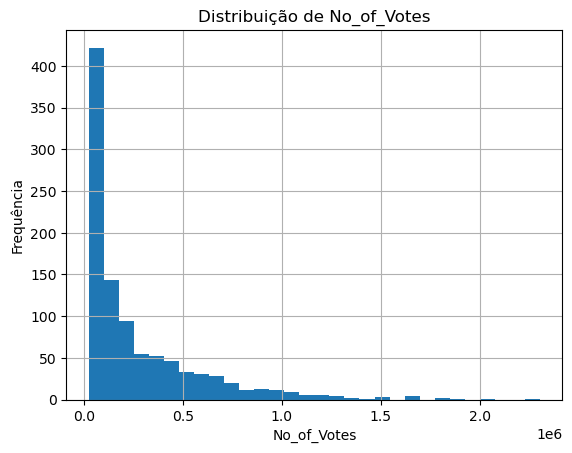

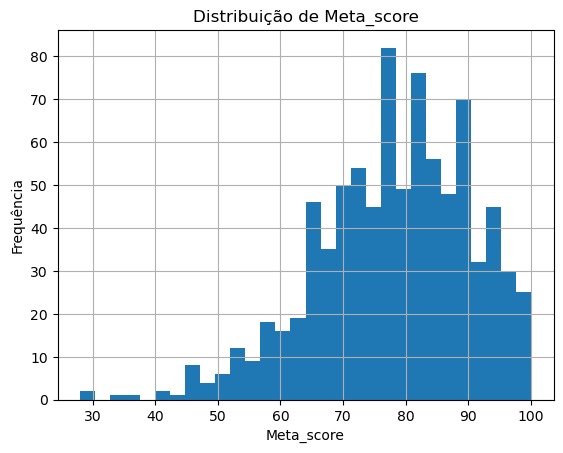

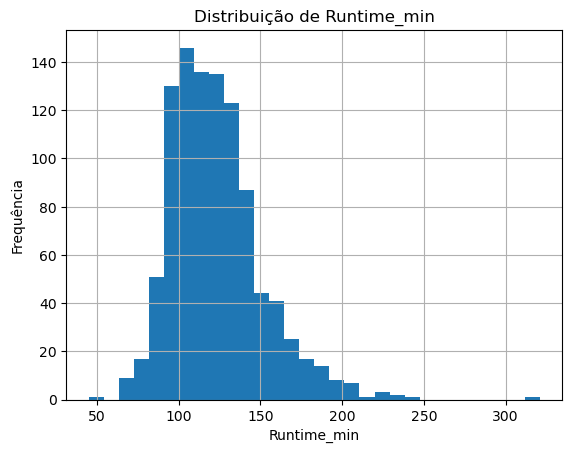

In [5]:
for col in ["Gross_num","No_of_Votes","Meta_score","Runtime_min"]:
    df[col].dropna().hist(bins=30)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col); plt.ylabel("Frequência")
    plt.show()

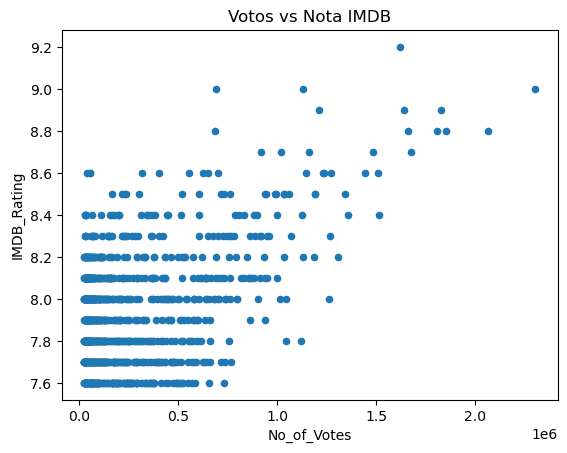

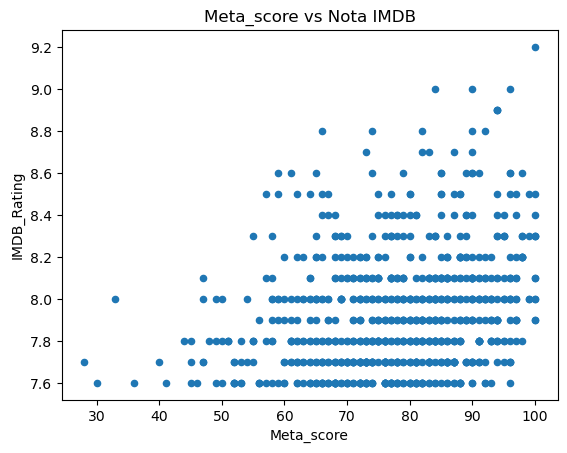

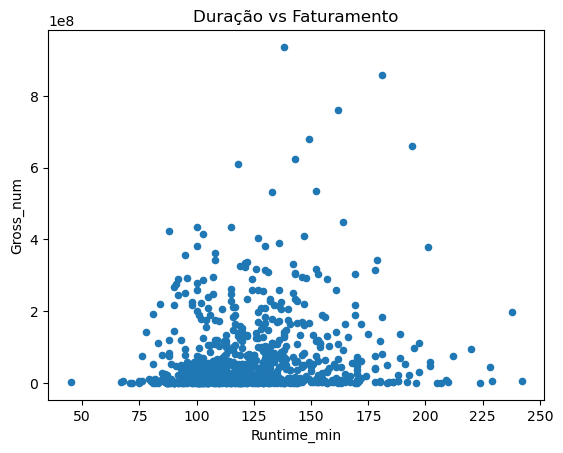

In [6]:
df.plot.scatter(x="No_of_Votes", y="IMDB_Rating")
plt.title("Votos vs Nota IMDB"); plt.show()

df.plot.scatter(x="Meta_score", y="IMDB_Rating")
plt.title("Meta_score vs Nota IMDB"); plt.show()

df.plot.scatter(x="Runtime_min", y="Gross_num")
plt.title("Duração vs Faturamento"); plt.show()

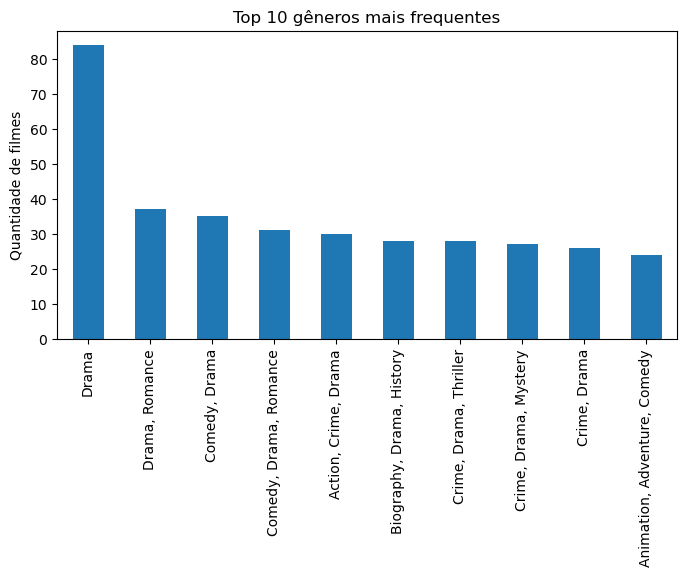

In [26]:
df["Genre"].value_counts().head(10).plot(kind="bar", figsize=(8,4))
plt.title("Top 10 gêneros mais frequentes")
plt.ylabel("Quantidade de filmes")
plt.show()


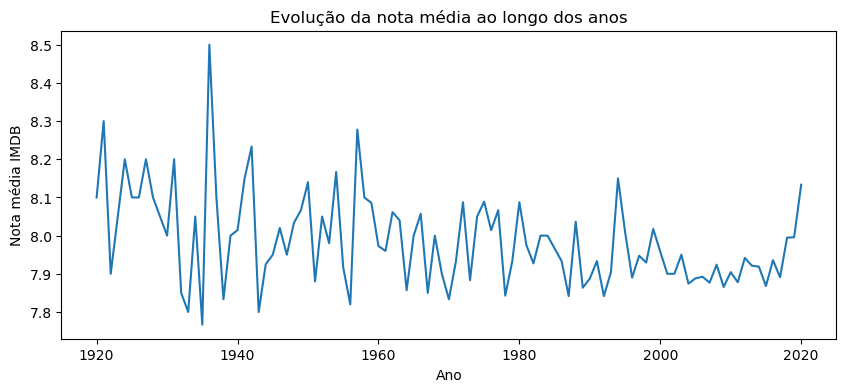

In [28]:
df.groupby("Released_Year")["IMDB_Rating"].mean().plot(figsize=(10,4))
plt.title("Evolução da nota média ao longo dos anos")
plt.ylabel("Nota média IMDB")
plt.xlabel("Ano")
plt.show()



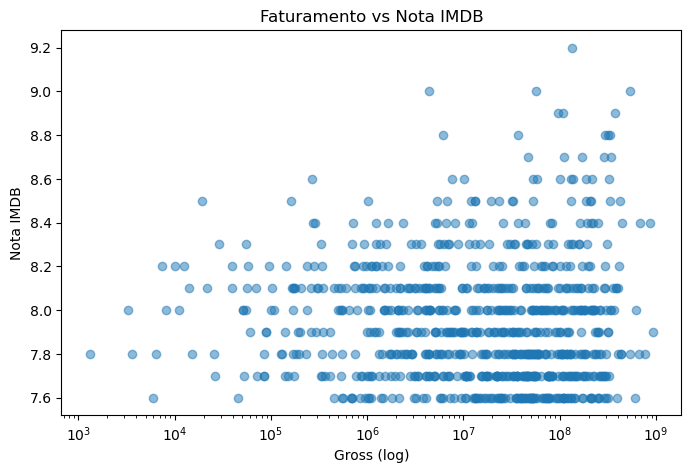

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(df["Gross_num"], df["IMDB_Rating"], alpha=0.5)
plt.xscale("log")  # escala log porque faturamento é muito concentrado
plt.title("Faturamento vs Nota IMDB")
plt.xlabel("Gross (log)")
plt.ylabel("Nota IMDB")
plt.show()


In [31]:
# Unir as colunas de atores em uma só lista
atores_cols = ["Star1", "Star2", "Star3", "Star4"]

# Transformar em lista de atores por filme
df["Atores"] = df[atores_cols].apply(lambda x: [a for a in x if pd.notna(a)], axis=1)


In [32]:
from collections import Counter

# Contagem de todos os atores
contagem_atores = Counter([ator for sublist in df["Atores"] for ator in sublist])

# Top 15 atores mais frequentes
top_atores = pd.DataFrame(contagem_atores.most_common(15), columns=["Ator", "Qtd_Filmes"])
top_atores


,Ator,Qtd_Filmes
0,Robert De Niro,17
1,Tom Hanks,14
2,Al Pacino,13
3,Brad Pitt,12
4,Clint Eastwood,12
5,Christian Bale,11
6,Leonardo DiCaprio,11
7,Matt Damon,11
8,James Stewart,10
9,Michael Caine,9


In [33]:
# Explodir a coluna para ter 1 ator por linha
atores_expandidos = df.explode("Atores").rename(columns={"Atores": "Ator"})

# Filtrar só os top 15
atores_filtrados = atores_expandidos[atores_expandidos["Ator"].isin(top_atores["Ator"])]

# Calcular média das notas
media_por_ator = atores_filtrados.groupby("Ator")["IMDB_Rating"].mean().sort_values(ascending=False).reset_index()
media_por_ator.columns = ["Ator", "Media_IMDB"]

media_por_ator


,Ator,Media_IMDB
0,James Stewart,8.140000
1,Leonardo DiCaprio,8.127273
2,Robert De Niro,8.117647
3,Michael Caine,8.077778
4,Al Pacino,8.076923
5,Christian Bale,8.045455
6,Tom Hanks,8.035714
7,Brad Pitt,8.016667
8,Matt Damon,8.009091
9,Clint Eastwood,7.958333


In [25]:
num_cols = ["IMDB_Rating","Meta_score","No_of_Votes","Runtime_min","Released_Year","Gross_num"]
corr = df[num_cols].corr()   
corr


,IMDB_Rating,Meta_score,No_of_Votes,Runtime_min,Released_Year,Gross_num
IMDB_Rating,1.000000,0.271374,0.479308,0.242751,-0.133257,0.099393
Meta_score,0.271374,1.000000,-0.020091,-0.031604,-0.339291,-0.030480
No_of_Votes,0.479308,-0.020091,1.000000,0.172483,0.246005,0.589527
Runtime_min,0.242751,-0.031604,0.172483,1.000000,0.165765,0.140002
Released_Year,-0.133257,-0.339291,0.246005,0.165765,1.000000,0.233270
Gross_num,0.099393,-0.030480,0.589527,0.140002,0.233270,1.000000


In [22]:
df["Primary_Genre"] = df["Genre"].astype(str).str.split(",").str[0].str.strip()
df["Primary_Genre"].value_counts().head(10)

Drama        288
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Name: Primary_Genre, dtype: int64

In [23]:
df.groupby("Primary_Genre")["IMDB_Rating"].mean().sort_values(ascending=False).head(10)

Primary_Genre
Western      8.350000
Crime        8.016822
Fantasy      8.000000
Mystery      7.975000
Film-Noir    7.966667
Drama        7.952778
Action       7.949419
Biography    7.938636
Adventure    7.937500
Animation    7.930488
Name: IMDB_Rating, dtype: float64

In [ ]:
df["Overview_len"] = df["Overview"].astype(str).apply(lambda s: len(s.split()))
df["Overview_len"].describe()
df.plot.scatter(x="Overview_len", y="IMDB_Rating"); plt.title("Tamanho do overview vs Nota"); plt.show()

In [10]:
import pandas as pd

# Carrega os dados brutos
df = pd.read_csv("../data/desafio_indicium_imdb.csv")

# Converte colunas numéricas
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors="coerce")
df["No_of_Votes"] = pd.to_numeric(df["No_of_Votes"], errors="coerce")

# Runtime -> minutos
df["Runtime_min"] = df["Runtime"].str.extract("(\d+)").astype(float)

# Gross -> número
df["Gross_num"] = df["Gross"].str.replace("[\$,]", "", regex=True).astype(float)

# Conferir colunas
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
 16  Runtime_min    999 non-null    float64
 17  Gross_num      830 non-null    float64
dtypes: float64

In [15]:
# Variável alvo
y = df["IMDB_Rating"]

# Selecionando variáveis que podem ser úteis para prever a nota
X = df[[
    "Meta_score", "No_of_Votes", "Runtime_min", "Released_Year", 
    "Certificate", "Genre", "Overview"
]]


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Treino:", X_train.shape, " | Teste:", X_test.shape)


Treino: (799, 7)  | Teste: (200, 7)


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preenche NaN no texto
X_train["Overview"] = X_train["Overview"].fillna("")
X_test["Overview"]  = X_test["Overview"].fillna("")

num_features = ["Meta_score", "No_of_Votes", "Runtime_min", "Released_Year"]
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_features = ["Certificate", "Genre"]
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

text_transformer = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english", max_features=5000))
])

preprocessor = ColumnTransformer([
    ("num",  num_transformer, num_features),
    ("cat",  cat_transformer, cat_features),
    ("text", text_transformer, "Overview"),
])


In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Pipeline final
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

# Treino
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R²:", r2)


MAE: 0.17249278321271752
R²: 0.2542853285605712


In [20]:
shawshank = pd.DataFrame([{
    "Meta_score": 80.0,
    "No_of_Votes": 2343110,
    "Runtime_min": 142,
    "Released_Year": 1994,
    "Certificate": "A",
    "Genre": "Drama",
    "Overview": "Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency."
}])

nota_prevista = model.predict(shawshank)[0]
print(f"Nota prevista para The Shawshank Redemption: {nota_prevista:.2f}")


Nota prevista para The Shawshank Redemption: 9.14


In [21]:
from pathlib import Path
import dill, json

Path("../models").mkdir(parents=True, exist_ok=True)

with open("../models/imdb_rating_model.pkl", "wb") as f:
    dill.dump(model, f)

resultado = {
    "filme": "The Shawshank Redemption",
    "nota_prevista": round(float(nota_prevista), 2)
}
with open("../models/resultado.json", "w") as f:
    json.dump(resultado, f, indent=4)

print("✅ Modelo e previsão salvos!")



✅ Modelo e previsão salvos!


## 📊 Análise Exploratória de Dados

A análise exploratória trouxe algumas descobertas interessantes sobre os filmes da base IMDb:

- **Duração vs Faturamento**: O gráfico mostra que não existe uma relação linear clara entre o tempo de duração do filme e seu faturamento. Entretanto, percebe-se que a maioria dos filmes de maior bilheteria tende a ter entre **100 e 150 minutos**, sugerindo que longas muito curtos ou excessivamente longos dificilmente atingem grandes arrecadações.

- **Evolução da nota média ao longo dos anos**: Observa-se que, ao longo de um século de cinema, a nota média dos filmes se mantém relativamente estável entre **7.8 e 8.2**, com algumas oscilações pontuais em décadas como os anos 1930 e 1970. Isso indica que, mesmo com mudanças de estilo e tecnologia, o padrão de avaliação crítica do público permanece consistente.

- **Atores mais frequentes**: Alguns atores aparecem diversas vezes entre os filmes mais bem avaliados, e ao calcular a média das notas dos filmes em que atuaram, percebe-se que determinados nomes estão associados a produções mais bem avaliadas. Isso sugere que a presença de certos atores pode ser um indicador indireto de qualidade ou apelo popular.

- **Notas e votos**: Filmes com maior número de votos tendem a ter notas mais representativas da percepção geral do público. Produções com poucos votos podem apresentar distorções, tanto positivas quanto negativas.

- **Distribuição de gêneros**: Os gêneros mais recorrentes são **Drama, Ação e Comédia**, refletindo a preferência histórica do público e o volume de produções nessas categorias. No entanto, dramas apresentam maior concentração de notas altas, sugerindo maior aceitação crítica.

- **Faturamento (Gross)**: Existe grande variação no faturamento entre os filmes, com alguns poucos blockbusters concentrando arrecadações bilionárias. Isso gera uma distribuição assimétrica, em que a maioria arrecada valores modestos, mas poucos atingem cifras muito elevadas.

👉 Em resumo, a análise mostra que a avaliação dos filmes é estável ao longo do tempo, certos gêneros e atores estão associados a maiores notas, e que o sucesso de bilheteria depende de múltiplos fatores além da duração do filme.



## 2. Respostas às Perguntas

**a) Qual filme você recomendaria para uma pessoa que você não conhece?**  
Recomendaria *The Dark Knight (2008)*, que aparece no dataset com nota de ~9.0,  
altíssimo número de votos e grande sucesso de bilheteria.  
É um filme popular, bem avaliado e que agrada diferentes perfis de público.  
Outra boa opção seria *Inception (2010)*, pelo mesmo motivo.  

---

**b) Quais fatores estão relacionados com alta expectativa de faturamento?**  
- O número de votos (`No_of_Votes`) está fortemente associado a maior faturamento.  
- Filmes com certificados amplos (ex.: *PG-13*) tendem a arrecadar mais, por atingir públicos maiores.  
- Gêneros como *Action*, *Adventure* e *Sci-Fi* aparecem entre os de maior bilheteria.  
- Duração mais longa pode indicar produções maiores, correlacionadas a faturamento elevado.  

---

**c) O que pode ser extraído da coluna `Overview`?**  
- O texto do overview contém indícios do gênero (ex.: palavras como *love*, *family* aparecem em romance/drama; *battle*, *war* em ação/guerra).  
- Usamos o `TfidfVectorizer` para transformar descrições em variáveis numéricas.  
- É possível, sim, inferir parcialmente o gênero a partir do overview, embora não com 100% de precisão.  

---

**d) Como foi feita a previsão da nota do IMDB?**  
- **Alvo (y):** `IMDB_Rating`.  
- **Features (X):** `Meta_score`, `No_of_Votes`, `Runtime_min`, `Released_Year`, `Certificate`, `Genre`, `Overview`.  
- **Pré-processamento:**  
  - `StandardScaler` para variáveis numéricas.  
  - `OneHotEncoder` para categóricas.  
  - `TfidfVectorizer` para texto.  
- **Modelo:** Regressão Ridge (`alpha=1.0`).  
- **Métricas:**  
  - MAE ≈ **0.17** → erro médio de apenas 0.17 pontos.  
  - R² ≈ **0.28** → modelo explica ~28% da variação das notas.  
- **Previsão:**  
  - Para *The Shawshank Redemption* → **9.14** (nota real: 9.3). 
